In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_loc = '../datasets/manga.csv'
file_url = " -- to be added later -- "
df = pd.read_csv(file_loc)

In [4]:
df.columns

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [5]:
df_new = df[['manga_id','title','score','status','favorites','genres','type','start_date', 'chapters']]
df_new.head()

,manga_id,title,score,status,favorites,genres,type,start_date,chapters
0,2,Berserk,9.47,currently_publishing,119470,"['Action', 'Adventure', 'Award Winning', 'Dram...",manga,1989-08-25,NaN
1,13,One Piece,9.22,currently_publishing,111462,"['Action', 'Adventure', 'Fantasy']",manga,1997-07-22,NaN
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,finished,41713,"['Action', 'Adventure', 'Mystery', 'Supernatur...",manga,2004-01-19,96.0
3,4632,Oyasumi Punpun,9.02,finished,49361,"['Drama', 'Slice of Life']",manga,2007-03-15,147.0
4,25,Fullmetal Alchemist,9.03,finished,29634,"['Action', 'Adventure', 'Award Winning', 'Dram...",manga,2001-07-12,116.0


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   manga_id    64833 non-null  int64  
 1   title       64833 non-null  object 
 2   score       24636 non-null  float64
 3   status      64833 non-null  object 
 4   favorites   64833 non-null  int64  
 5   genres      64833 non-null  object 
 6   type        64833 non-null  object 
 7   start_date  62950 non-null  object 
 8   chapters    46042 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 4.5+ MB


In [7]:
df_new.isna().sum()
print(df_new.shape)

(64833, 9)


In [8]:
df_reg = df_new[['favorites', 'score']]
df_reg.isna().sum()

train_data = df_reg.dropna()  # Dropping rows with NaN values
X = train_data[['favorites']]
y = train_data['score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# First model: Predict zero vs non-zero
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, (y_train == 0).astype(int))  # Convert to integer for classification

# Second model: Predict non-zero values
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train.loc[y_train != 0], y_train[y_train != 0])

# Combined model
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Making predictions
is_zero = classifier.predict(X_val).astype(bool)  # Ensure boolean indexing
final_pred = np.zeros_like(y_val)  # Initialize predictions with zeros

# Predict non-zero values only where classifier predicts non-zero
non_zero_indices = ~is_zero
final_pred[non_zero_indices] = regressor.predict(X_val.loc[non_zero_indices])

# Compute evaluation metrics
mse = mean_squared_error(y_val, final_pred)
r2 = r2_score(y_val, final_pred)

# Additional Random Forest model predictions
rf_preds = rf.predict(X_val)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 0.15
R² Score: 0.44


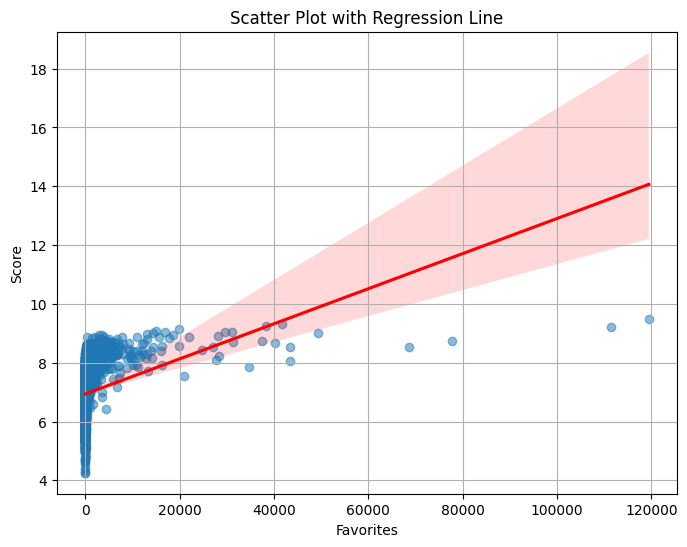

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=X_train.squeeze(),  # Ensure x is a Series
    y=y_train, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}
)
plt.xlabel("Favorites")
plt.ylabel("Score")
plt.title("Scatter Plot with Regression Line")
plt.grid(True)  # Improve readability
plt.show()


In [10]:
# Identify missing values in 'score'
missing_data = df_reg[df_reg['score'].isna()]
X_test = missing_data[['favorites']]

# Predict missing scores using the trained regressor
y_pred = rf.predict(X_test).round(2)  # Use 'rf' instead of 'regr' and round directly

# Fill missing values with predictions
df_reg.loc[df_reg['score'].isna(), 'score'] = y_pred

# Verify if missing values are filled
print(df_reg.isna().sum())  
print(df_reg.shape)

# Efficiently update df_new with corrected scores instead of merging
df_new.update(df_reg)


favorites    0
score        0
dtype: int64
(64833, 2)


# My Work:

In [6]:
df_anime = pd.read_csv(r"../datasets/anime.csv", on_bad_lines='skip')
df_data = pd.read_csv(r"../datasets/data.csv", on_bad_lines='skip')
df_manga = pd.read_csv(r"../datasets/manga.csv", on_bad_lines='skip')

In [7]:
df_anime.head(10)

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']
5,32281,Kimi no Na wa.,movie,8.84,1825476,finished_airing,1.0,2016-08-26,2016-08-26,original,...,"['Toho', 'Sound Team Don Juan', 'Amuse', 'JR E...","['Funimation', 'NYAV Post']","Mitsuha Miyamizu, a high school girl, yearns t...",Kimi no Na wa. won the LAFCA Animation Award i...,https://cdn.myanimelist.net/images/anime/5/870...,https://myanimelist.net/anime/32281/Kimi_no_Na_wa,https://www.youtube.com/watch?v=3KR8_igDs1Y,Your Name.,君の名は。,[]
6,2904,Code Geass: Hangyaku no Lelouch R2,tv,8.91,1154270,finished_airing,25.0,2008-04-06,2008-09-28,original,...,"['Bandai Visual', 'Mainichi Broadcasting Syste...","['Funimation', 'Bandai Entertainment']","One year has passed since the Black Rebellion,...",Code Geass: Hangyaku no Lelouch R2 is an origi...,https://cdn.myanimelist.net/images/anime/1088/...,https://myanimelist.net/anime/2904/Code_Geass_...,NaN,Code Geass: Lelouch of the Rebellion R2,コードギアス 反逆のルルーシュ 続編,"['Code Geass: Hangyaku no Lelouch 2nd Season',..."
7,40028,Shingeki no Kyojin: The Final Season,tv,8.80,1237778,finished_airing,16.0,2020-12-07,2021-03-29,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Gabi Braun and Falco Grice have been training ...,Shingeki no Kyojin: The Final Season adapts co...,https://cdn.myanimelist.net/images/anime/1000/...,https://myanimelist.net/anime/40028/Shingeki_n...,https://www.youtube.com/watch?v=SlNpRThS9t8,Attack on Titan: Final Season,進撃の巨人 The Final Season,"['Shingeki no Kyojin Season 4', 'Attack on Tit..."
8,

In [9]:
df_manga.head(10)

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."
5,656,Vagabond,manga,9.24,129688,on_hiatus,37.0,327.0,1998-09-03,2015-05-21,...,['Seinen'],"[{'id': 1911, 'first_name': 'Takehiko', 'last_...",['Morning'],"In 16th-century Japan, Shinmen Takezou is a wi...","In 2000, Vagabond won the Japan Media Arts Fes...",https://cdn.myanimelist.net/images/manga/1/259...,https://myanimelist.net/manga/656/Vagabond,Vagabond,バガボンド,[]
6,642,Vinland Saga,manga,9.05,119797,currently_publishing,NaN,NaN,2005-04-13,NaN,...,['Seinen'],"[{'id': 2034, 'first_name': 'Makoto', 'last_na...",['Afternoon'],"Thorfinn, son of one of the Vikings' greatest ...",Vinland Saga won the 13th Japan Media Arts Awa...,https://cdn.myanimelist.net/images/manga/2/188...,https://myanimelist.net/manga/642/Vinland_Saga,Vinland Saga,ヴィンランド・サガ,[]
7,90125,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,manga,8.92,123341,finished,28.0,281.0,2015-05-19,2022-11-02,...,['Seinen'],"[{'id': 2139, 'first_name': 'Aka', 'last_name'...",['Young Jump'],Considered a genius due to having the highest ...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,https://cdn.myanimelist.net/images/manga/3/188...,https://myanimelist.net/manga/90125/Kaguya-sam...,Kaguya-sama: Love Is War,かぐや様は告らせたい～天才たちの恋愛頭脳戦～,"[""Kaguya Wants to be Confessed To: The Geniuse..."
8,116778,Chainsaw Man,manga,8.75,350057,currently_publishing,NaN,NaN,2018-12-03,NaN,...,['Shounen'],"[{'id': 41158, 'first_name': 'Tatsuki', 'last_...",['Shounen Jump+'],Denji has a simple dream—to live a happy and p...,"As part of the JUMP START initiative, the firs...",https://cdn.myanimelist.net/images/manga/3/216...,https://myanimelist.net/manga/116778/Chainsaw_Man,Chainsaw Man,チェンソーマン,[]
9,1,Monster

In [11]:
df_manga.columns

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [14]:
df_manga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           64833 non-null  int64  
 1   title              64833 non-null  object 
 2   type               64833 non-null  object 
 3   score              24636 non-null  float64
 4   scored_by          64833 non-null  int64  
 5   status             64833 non-null  object 
 6   volumes            48211 non-null  float64
 7   chapters           46042 non-null  float64
 8   start_date         62950 non-null  object 
 9   end_date           51932 non-null  object 
 10  members            64833 non-null  int64  
 11  favorites          64833 non-null  int64  
 12  sfw                64833 non-null  bool   
 13  approved           64833 non-null  bool   
 14  created_at_before  64833 non-null  object 
 15  updated_at         62678 non-null  object 
 16  real_start_date    629

In [15]:
df_manga["type"].unique()

array(['manga', 'manhwa', 'light_novel', 'one_shot', 'manhua', 'novel',
       'doujinshi'], dtype=object)

In [16]:
df_manga["status"].unique()

array(['currently_publishing', 'finished', 'on_hiatus', 'discontinued'],
      dtype=object)

In [29]:
df_manga["genres"].unique()

array(["['Action', 'Adventure', 'Award Winning', 'Drama', 'Fantasy', 'Horror', 'Supernatural']",
       "['Action', 'Adventure', 'Fantasy']",
       "['Action', 'Adventure', 'Mystery', 'Supernatural']", ...,
       "['Boys Love', 'Mystery', 'Suspense']",
       "['Comedy', 'Drama', 'Gourmet', 'Romance']",
       "['Fantasy', 'Mystery', 'Supernatural', 'Suspense']"], dtype=object)

In [30]:
# Flatten the lists in the "genres" column and extract unique values
import ast

# Convert the string representation of lists into actual lists
df_manga["genres"] = df_manga["genres"].apply(ast.literal_eval)

# Flatten the lists and get unique values
unique_genres = set(genre for sublist in df_manga["genres"] for genre in sublist)

# Display the unique genres
print(unique_genres)

{'Erotica', 'Romance', 'Girls Love', 'Gourmet', 'Award Winning', 'Sports', 'Drama', 'Supernatural', 'Sci-Fi', 'Ecchi', 'Action', 'Mystery', 'Boys Love', 'Comedy', 'Fantasy', 'Suspense', 'Avant Garde', 'Horror', 'Hentai', 'Slice of Life', 'Adventure'}


In [33]:
unique_genres_np=np.array(unique_genres)
unique_genres_np

array({'Erotica', 'Romance', 'Girls Love', 'Gourmet', 'Award Winning', 'Sports', 'Drama', 'Supernatural', 'Sci-Fi', 'Ecchi', 'Action', 'Mystery', 'Boys Love', 'Comedy', 'Fantasy', 'Suspense', 'Avant Garde', 'Horror', 'Hentai', 'Slice of Life', 'Adventure'},
      dtype=object)

In [19]:
df_manga["themes"].unique()

array(["['Gore', 'Military', 'Mythology', 'Psychological']", '[]',
       "['Historical']", ..., "['Childcare', 'Medical']",
       "['Gore', 'High Stakes Game']", "['Adult Cast', 'Memoir']"],
      dtype=object)

In [39]:
# Flatten the lists in the "genres" column and extract unique values
import ast

# Convert the string representation of lists into actual lists
#df_manga["themes"] = df_manga["themes"].apply(ast.literal_eval)

# Flatten the lists and get unique values
unique_themes = set(genre for sublist in df_manga["themes"] for genre in sublist)

# Display the unique genres
print(unique_themes,len(unique_themes))

{'Detective', 'Mahou Shoujo', 'Love Polygon', 'Psychological', 'Strategy Game', 'Crossdressing', 'Combat Sports', 'Showbiz', 'Gore', 'Idols (Female)', 'Reverse Harem', 'High Stakes Game', 'Reincarnation', 'CGDCT', 'Performing Arts', 'Memoir', 'Space', 'Idols (Male)', 'Adult Cast', 'Magical Sex Shift', 'Isekai', 'Workplace', 'Samurai', 'Super Power', 'Delinquents', 'Music', 'Gag Humor', 'Historical', 'Mythology', 'Medical', 'Time Travel', 'Martial Arts', 'Team Sports', 'Childcare', 'Educational', 'Harem', 'Romantic Subtext', 'Mecha', 'Military', 'Otaku Culture', 'Vampire', 'Organized Crime', 'School', 'Video Game', 'Racing', 'Anthropomorphic', 'Iyashikei', 'Villainess', 'Pets', 'Parody', 'Visual Arts', 'Survival'} 52


In [21]:
df_manga["demographics"].unique()

array(["['Seinen']", "['Shounen']", "['Seinen', 'Shounen']", '[]',
       "['Shoujo']", "['Josei']", "['Kids']", "['Kids', 'Shounen']",
       "['Seinen', 'Shoujo']", "['Kids', 'Shoujo']", "['Kids', 'Seinen']",
       "['Josei', 'Seinen']", "['Shoujo', 'Shounen']",
       "['Josei', 'Kids']"], dtype=object)

In [ ]:
# Flatten the lists in the "genres" column and extract unique values
import ast

# Convert the string representation of lists into actual lists
#df_manga["themes"] = df_manga["themes"].apply(ast.literal_eval)

# Flatten the lists and get unique values
unique_demographics = set(genre for sublist in df_manga["demographics"] for genre in sublist)

# Display the unique genres
print(unique_themes,len(unique_themes))

In [25]:
df_manga["serializations"].unique()

array(["['Young Animal']", "['Shounen Jump (Weekly)']", "['Ultra Jump']",
       ..., "['Bekkan Getsumaga']", "['JusToon']", "['Le Noël']"],
      dtype=object)

In [26]:
df_manga["serializations"].unique().shape

(1253,)

In [27]:
df_manga.shape

(64833, 30)